<a href="https://colab.research.google.com/github/Msaleemakhtar/Deep-Learning-with-pytorch/blob/main/05_comp_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multi-class Classification**

* Image Classification Problem

In [40]:
# import pytorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# import plotlib for visulization

import matplotlib.pyplot as plt

# check version
print(torch.__version__)
print(torchvision.__version__)

2.2.1+cu121
0.17.1+cu121


In [41]:
#preparing data

# Training data
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    transform=ToTensor(), # torchvision.transforms.ToTensor()
    download=True
)

# Testing data
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    transform=ToTensor(),
    download=True
)

In [42]:
print(len(train_data))
print(len(test_data))

60000
10000


In [43]:
image , label = train_data[0]



In [44]:
# Input and output shape of image
print(image.shape)



torch.Size([1, 28, 28])


In [45]:
Traindata = len(train_data.data)
print("Train_data :", Traindata)

Train_data_targets = len(train_data.targets)
print("Train_data_targets :", Train_data_targets)

Test_data = len(train_data.data)
print("Test_data :", Test_data)

Test_data_targets = len(train_data.data)
print("Test_data_targets :", Test_data_targets)




Train_data : 60000
Train_data_targets : 60000
Test_data : 60000
Test_data_targets : 60000


In [46]:
# Classes in train data

classes_in_data = train_data.classes
classes_in_data

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

image_shape : torch.Size([1, 28, 28])
Ankle boot


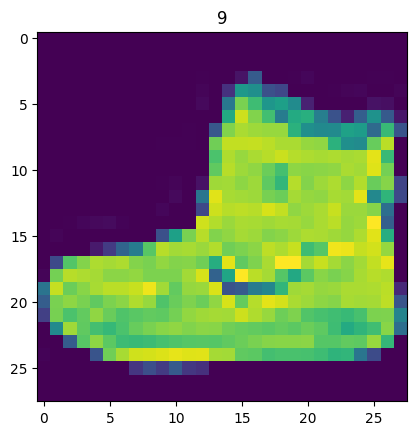

In [47]:
# Visualize the data

image , label = train_data[0]
print(f"image_shape : {image.shape}")
plt.imshow(image.squeeze())
plt.title(label)
print(classes_in_data[label])

image_shape : torch.Size([1, 28, 28])
Ankle boot


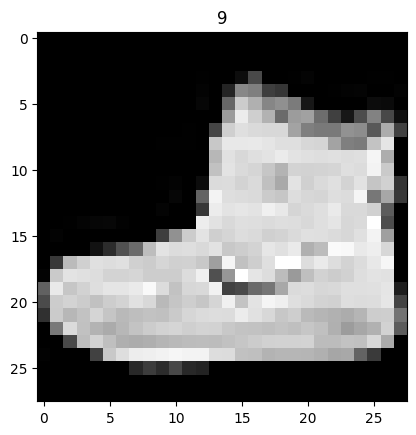

In [48]:
# Visualize the data

image , label = train_data[0]
print(f"image_shape : {image.shape}")
plt.imshow(image.squeeze(), cmap = "gray")
plt.title(label)
print(classes_in_data[label])

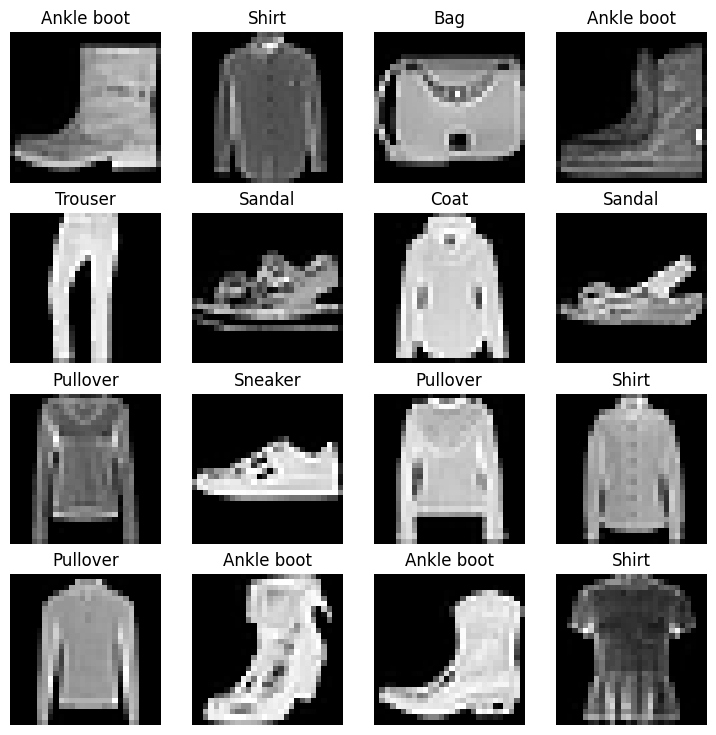

In [49]:
# plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))

rows, columns = 4,4

for i in range(1, rows * columns +1):
  random_indx = torch.randint(0, len(train_data), size=[1]).item()
  image , label = train_data[random_indx]
  fig.add_subplot(rows, columns, i)
  plt.imshow(image.squeeze(), cmap="gray")
  plt.title(classes_in_data[label])
  plt.axis(False)



In [50]:
# to make the data iterable (convert tensor data into python iterable )
from torch.utils.data import DataLoader
# set the hyperparameter
BATCH_SIZE = 32
train_dataloader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size = BATCH_SIZE, shuffle = False)

print(len(train_dataloader))
print(len(test_dataloader))

1875
313


In [51]:
test_dataloader.dataset

Dataset FashionMNIST
    Number of datapoints: 10000
    Root location: data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [52]:
train_dataloader

In [53]:
train_feature_batch, train_label_batch = next(iter(train_dataloader))
print(train_feature_batch.shape)
print(train_label_batch.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


In [54]:
y = train_label_batch

Image size: torch.Size([1, 28, 28])
Label: 6, label size: torch.Size([])


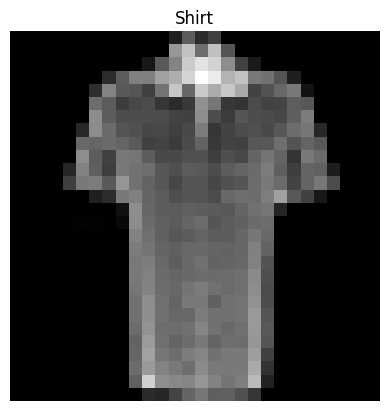

In [55]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_feature_batch), size=[1]).item()
img, label = train_feature_batch[random_idx], train_label_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(classes_in_data[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [56]:
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true, y_pred).sum().item()
  acc = (correct / len(y_pred)) * 100
  return acc


In [57]:
# creating a function to time experiment
from timeit import default_timer as timer

def print_train_time(start:float, end:float, device:torch.device = None):
  total_time = end - start

  print(f"Training time on device {device}:{total_time:.5f}seconds ")
  return total_time

In [58]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [59]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader

def train_step(model: nn.Module,
               data_loader: DataLoader,
               loss_fn: nn.Module,
               optimizer: optim.Optimizer,
               accuracy_fn,
               device: torch.device = device):
    train_loss, train_acc = 0.0, 0.0
    model.to(device)
    model.train()  # Set the model to training mode

    for batch, (X, y) in enumerate(data_loader):
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc+=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

        # set up the zer_grade
        optimizer.zero_grad()

        # forward pass
        loss.backward()

        # set the step
        optimizer.step()
    # calculate the loss per epoch
    train_loss/= len(data_loader)
    train_acc /= len(data_loader)
    print(f"training loss : {train_loss:.5f}| taining_acc : {train_acc:.2f}%")


In [60]:
import torch
from torch import nn, optim
from torch.utils.data import DataLoader

def test_step(model: nn.Module,
               data_loader: DataLoader,
               loss_fn: nn.Module,
               accuracy_fn,
               device: torch.device = torch.device("cpu")):
    test_loss, test_acc = 0.0, 0.0
    model.to(device)
    model.eval()  # Set the model to training mode

    with torch.inference_mode():
      for X, y in data_loader:
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)
        test_loss += loss
        test_acc+=accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))

    # calculate the loss per epoch
      test_loss/= len(data_loader)
      test_acc /= len(data_loader)
      print(f"test loss : {test_loss:.5f}| test_acc : {test_acc:.2f}%")




In [61]:
classes_in_data

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [62]:
torch.manual_seed(42)
image = torch.randn(32, 3, 64,64)
test_image = image[0]

In [63]:
image[0].shape

torch.Size([3, 64, 64])

In [64]:

test_image

tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [65]:
# replicate the conv2d layer
testing_conv2d = nn.Conv2d(
    in_channels=3,
    out_channels=10,
    kernel_size= 3,
    stride=1,
    padding=0
)

In [66]:
testing_conv2d(test_image.unsqueeze(dim=0)).shape

torch.Size([1, 10, 62, 62])

In [67]:
con_layer = nn.MaxPool2d(kernel_size=2)

test_image_through_conv = con_layer(test_image.unsqueeze(dim=0))

test_image_through_conv.shape

torch.Size([1, 3, 32, 32])

In [68]:
# Create a convolutional neural network
class FashionMNISTModelV2(nn.Module):
    """
    Model architecture copying TinyVGG from:
    https://poloclub.github.io/cnn-explainer/
    """
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3, # how big is the square that's going over the image?
                      stride=1, # default
                      padding=1),# options = "valid" (no padding) or "same" (output has same shape as input) or int for specific number
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2,
                         stride=2) # default stride value is same as kernel_size
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            # Where did this in_features shape come from?
            # It's because each layer of our network compresses and changes the shape of our inputs data.
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
        )

    def forward(self, x: torch.Tensor):
        x = self.block_1(x)
        #print(x.shape)
        x = self.block_2(x)
        #print(x.shape)
        x = self.classifier(x)
        #print(x.shape)
        return x

torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1,
    hidden_units=10,
    output_shape=len(classes_in_data)).to(device)


In [69]:
image , label = train_data[0]
image.shape


torch.Size([1, 28, 28])

In [70]:
# setuCp loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params= model_2.parameters(), lr = .1)

In [71]:
torch.manual_seed(42)
from timeit import default_timer as timer
from tqdm.auto import tqdm

train_start_time = timer()

epochs = 3

for epoch in tqdm(range(epochs)):
  train_step(model= model_2,
             data_loader=train_dataloader,
             loss_fn= loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)

  test_step(model=model_2,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

train_end_time = timer()

total_train_time = print_train_time(start=train_start_time, end=train_end_time, device = device)

  0%|          | 0/3 [00:00<?, ?it/s]

training loss : 0.59199| taining_acc : 78.52%
test loss : 0.39149| test_acc : 86.01%
training loss : 0.36320| taining_acc : 86.84%
test loss : 0.35274| test_acc : 86.98%
training loss : 0.32550| taining_acc : 88.19%
test loss : 0.32209| test_acc : 88.15%
Training time on device cuda:43.46714seconds 


In [72]:
!pip install -q torchmetrics -U mlxtend

In [73]:
device

'cuda'

In [76]:
from tqdm.auto import tqdm

y_preds = []

# Ensure the model is on the target device
model_2.to(device)
model_2.eval()

with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc="Making prediction"):
        # Send data and targets to target device
        X, y = X.to(device), y.to(device)
        # forward pass
        y_logits = model_2(X)
        # turn logits --> pred_prob --> pred_labels
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

        y_preds.append(y_pred.cpu())

# concatenate all y_preds
y_preds_tensor = torch.cat(y_preds)




Making prediction:   0%|          | 0/313 [00:00<?, ?it/s]

In [77]:
y_preds_tensor

tensor([9, 2, 1,  ..., 8, 1, 5])

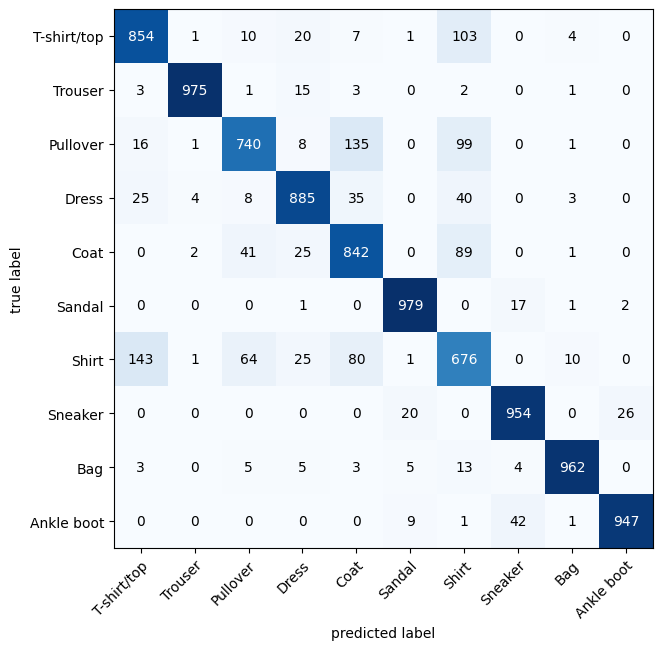

In [80]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(classes_in_data), task='multiclass')
confmat_tensor = confmat(preds=y_preds_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy
    class_names=classes_in_data, # turn the row and column labels into class names
    figsize=(10, 7)
);



